Missing data for 2021-05-04 00:00:00


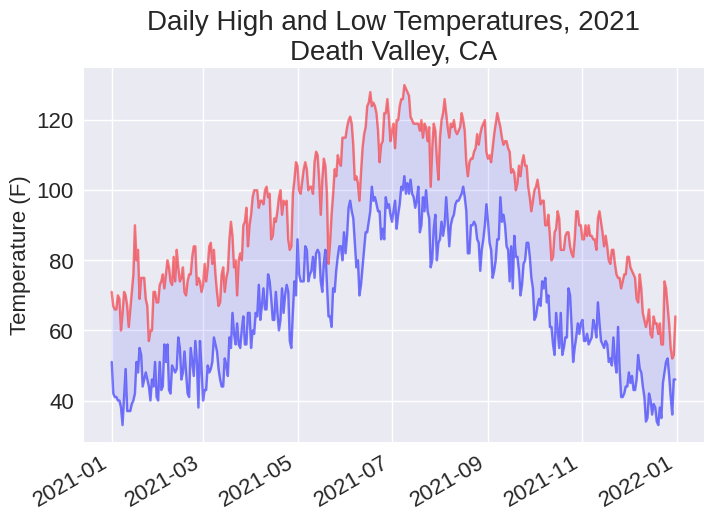

In [8]:
from pathlib import Path
import csv
#from datetime import datetime

import matplotlib.pyplot as plt


path = Path('death_valley_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures, 2021\nDeath Valley, CA"
ax.set_title(title, fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

#This Python notebook is part of Eric Matthes' Python Crash Course book:

#Matthes, E. (2022). Python crash course: A hands-on, project-based
#introduction to programming (3rd ed.). No Starch Press.